In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import string

# Load the dataset
df = pd.read_csv('blogs.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())





                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
Data      0
Labels    0
dtype: int64


# Data cleaning and preprocessing

In [35]:

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_data'] = df['Data'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# extraction using TF-IDF

In [36]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_data']).toarray()
y = df['Labels']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Evaluate the Naive Bayes classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Display the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8225
Precision: 0.8276176687627891
Recall: 0.8225
F1 Score: 0.8171026916205227
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62     

# Confusion matrix

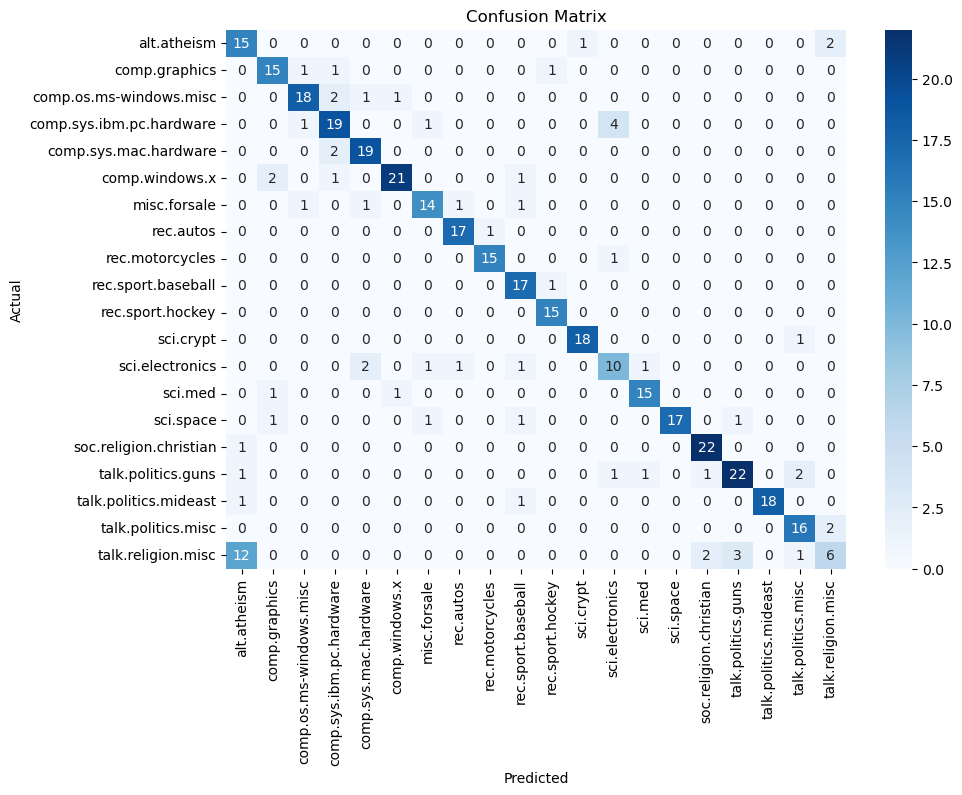

In [37]:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# Sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].apply(analyze_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:
# Examine the distribution of sentiments across different categories
sentiment_distribution = pd.crosstab(df['Labels'], df['Sentiment'])
print(sentiment_distribution)


Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                     42        1        57
comp.graphics                   13        4        83
comp.os.ms-windows.misc         24        2        74
comp.sys.ibm.pc.hardware        21        0        79
comp.sys.mac.hardware           24        3        73
comp.windows.x                  20        2        78
misc.forsale                     7        8        85
rec.autos                       27        1        72
rec.motorcycles                 30        2        68
rec.sport.baseball              27        1        72
rec.sport.hockey                28        1        71
sci.crypt                       29        0        71
sci.electronics                 18        4        78
sci.med                         38        1        61
sci.space                       32        3        65
soc.religion.christian          29        0        71
talk.politics.guns          

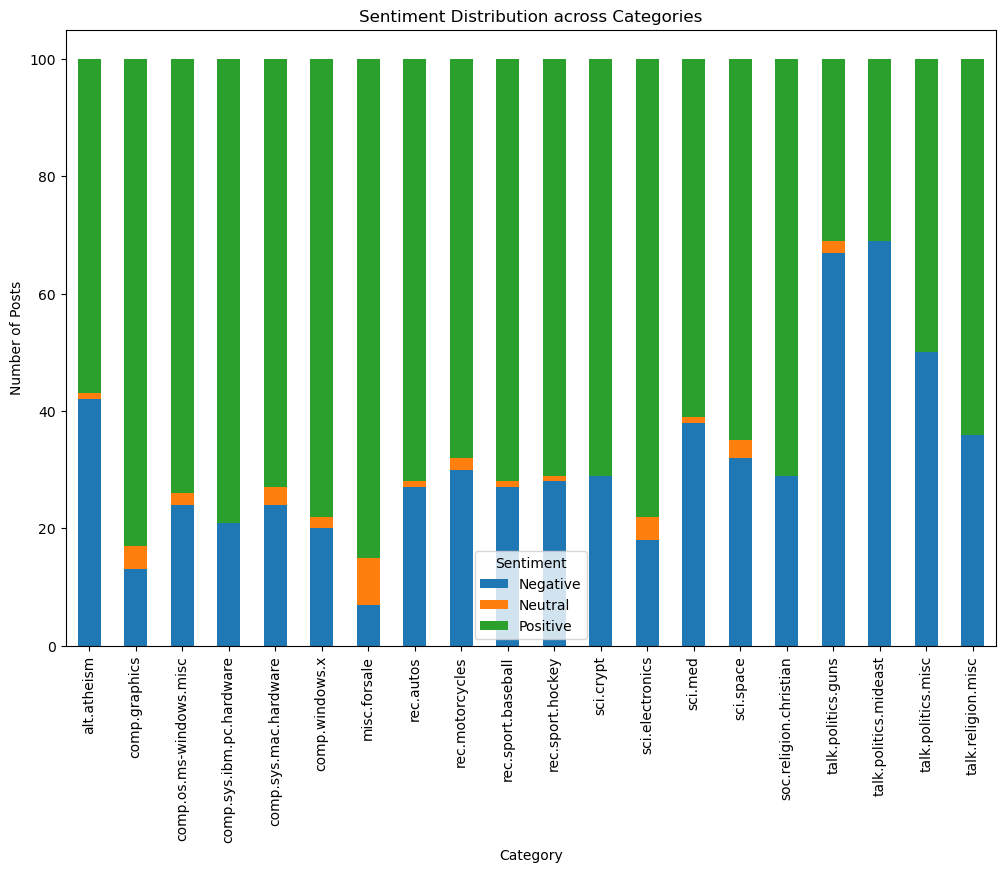

In [40]:
# Plot sentiment distribution
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.show()

In [41]:
# Summarize findings
print("Summary of findings:")
print(f"The Naive Bayes classifier achieved an accuracy of {accuracy:.2f}, precision of {precision:.2f}, recall of {recall:.2f}, and F1 score of {f1:.2f}.")
print("The sentiment analysis revealed the following distribution of sentiments across different categories:")
print(sentiment_distribution)

# Save the processed dataset and results
df.to_csv('processed_blogs.csv', index=False)



Summary of findings:
The Naive Bayes classifier achieved an accuracy of 0.82, precision of 0.83, recall of 0.82, and F1 score of 0.82.
The sentiment analysis revealed the following distribution of sentiments across different categories:
Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                     42        1        57
comp.graphics                   13        4        83
comp.os.ms-windows.misc         24        2        74
comp.sys.ibm.pc.hardware        21        0        79
comp.sys.mac.hardware           24        3        73
comp.windows.x                  20        2        78
misc.forsale                     7        8        85
rec.autos                       27        1        72
rec.motorcycles                 30        2        68
rec.sport.baseball              27        1        72
rec.sport.hockey                28        1        71
sci.crypt                       29        0        71
sci.ele